In [1]:
# import dependencies
from sklearn import tree
import pandas as pd
import numpy as np
import os

In [2]:
# read in dataset
final_full = pd.read_csv("../data/final_full.csv")

# print columns
for column in final_full.columns:
    print(column)

# preview dataset
final_full.head()

year
player
affiliation
overall_pick
position
lane_agility
shuttle_run
sprint
standing_leap
max_leap
bench_press
body_fat
hand_length
hand_width
height_no_shoes
height_shoes
reach
weight
wingspan
classification
assist_percentage
assists
block_percentage
blocks
defensive_rebound_percentage
defensive_rebounds
effective_field_goal_percentage
field_goal_attempts
field_goals
free_throw_attempt_rate
free_throw_attempt
free_throw_percentage
free_throws
minutes_played
offensive_rebound_percentage
offensive_rebounds
personal_fouls
points
steal_percentage
steals
three_point_attempt_rate
three_point_attempts
three_point_percentage
three_pointers
total_rebound_percentage
total_rebounds
true_shooting_percentage
turnover_percentage
turnovers
two_point_attempts
two_point_percentage
two_pointers
usage_percentage
player_id
classification.1


,year,player,affiliation,overall_pick,position,lane_agility,shuttle_run,sprint,standing_leap,max_leap,...,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,player_id,classification.1
0,2000,A.J. Guyton,Indiana,32,G,10.55,3.04,3.22,33.0,37.5,...,429,0.572,13.6,218.0,958,0.484,464,NaN,aj-guyton-1,Bust
1,2007,Aaron Brooks,Oregon,26,G,10.57,3.04,3.20,32.5,39.5,...,397,0.565,18.5,303.0,616,0.479,295,23.2,aaron-brooks-1,Role Player
2,2014,Aaron Gordon,Arizona,4,F,10.81,2.76,3.27,32.5,39.0,...,303,0.503,10.5,55.0,337,0.513,173,23.2,aaron-gordon-1,Bust
3,2007,Aaron Gray,Pittsburgh,49,C,12.07,3.10,3.70,27.0,32.5,...,790,0.565,15.2,176.0,789,0.550,434,24.9,aaron-gray-1,Bust
4,2018,Aaron Holiday,California-Los Angeles,23,G,10.96,3.22,3.27,25.5,33.0,...,320,0.580,19.6,304.0,631,0.469,296,23.3,aaron-holiday-1,Bust


In [33]:
# limit data to '00-'14
limit_yrs = final_full.loc[final_full['year'] <= 2014]

limit_yrs.tail()

,year,player,affiliation,overall_pick,position,lane_agility,shuttle_run,sprint,standing_leap,max_leap,...,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,player_id,classification.1
728,2010,Willie Warren,Oklahoma,54,G,11.21,3.04,3.50,23.00,31.50,...,149,0.590,17.9,160.0,329,0.550,181,24.8,willie-warren-1,Bust
729,2007,Wilson Chandler,DePaul,23,F,11.46,3.10,3.30,29.41,34.23,...,416,0.504,12.3,106.0,517,0.487,252,23.2,wilson-chandler-1,Starter
730,2010,Xavier Henry,Kansas,12,G,11.10,3.04,3.18,28.50,36.50,...,157,0.591,14.4,69.0,189,0.492,93,23.4,xavier-henry-1,Bust
732,2014,Zach LaVine,California-Los Angeles,13,G,10.42,2.80,3.19,33.50,41.50,...,94,0.545,11.6,42.0,160,0.494,79,20.1,zach-lavine-1,Bust
733,2001,Zach Randolph,Michigan State,19,F,11.46,3.10,3.30,29.41,34.23,...,221,0.604,15.2,53.0,234,0.590,138,NaN,zach-randolph-1,All-Star


In [4]:
target = limit_yrs['classification']

# drop unnecessary columns
data_clean = limit_yrs.drop(['year', 'affiliation', 'position', 'player', 'overall_pick', 'player_id', 'classification', 'classification.1'], axis = 1)

# replace NAs with imputed values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis = 0)

for column in data_clean.columns:
    data_clean[[column]] = imputer.fit_transform(data_clean[[column]])
    
feature_names = data_clean.columns

#data_clean.head()

/Users/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean, target, random_state = 23)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3706293706293706

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6433566433566433

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.036138647602496694, 'two_point_percentage'),
 (0.032408071858120384, 'assist_percentage'),
 (0.031752154989856, 'true_shooting_percentage'),
 (0.030080258778979373, 'effective_field_goal_percentage'),
 (0.028751584365540518, 'assists'),
 (0.02865306404550055, 'free_throw_percentage'),
 (0.028189720950889847, 'steals'),
 (0.02791210651255814, 'body_fat'),
 (0.027644278674483796, 'sprint'),
 (0.025981250298929726, 'offensive_rebounds'),
 (0.025272199613379367, 'free_throw_attempt_rate'),
 (0.02522308694553647, 'minutes_played'),
 (0.02518947394203469, 'three_point_attempts'),
 (0.02375655338708552, 'personal_fouls'),
 (0.023704874917757777, 'turnovers'),
 (0.022763466120651422, 'free_throws'),
 (0.022397635688597806, 'weight'),
 (0.02217728655220707, 'blocks'),
 (0.02148874562202141, 'two_pointers'),
 (0.021465660417623527, 'three_pointers'),
 (0.021422576193958032, 'usage_percentage'),
 (0.021205422993593855, 'total_rebound_percentage'),
 (0.021074229456140035, 'total_rebounds'),
 (

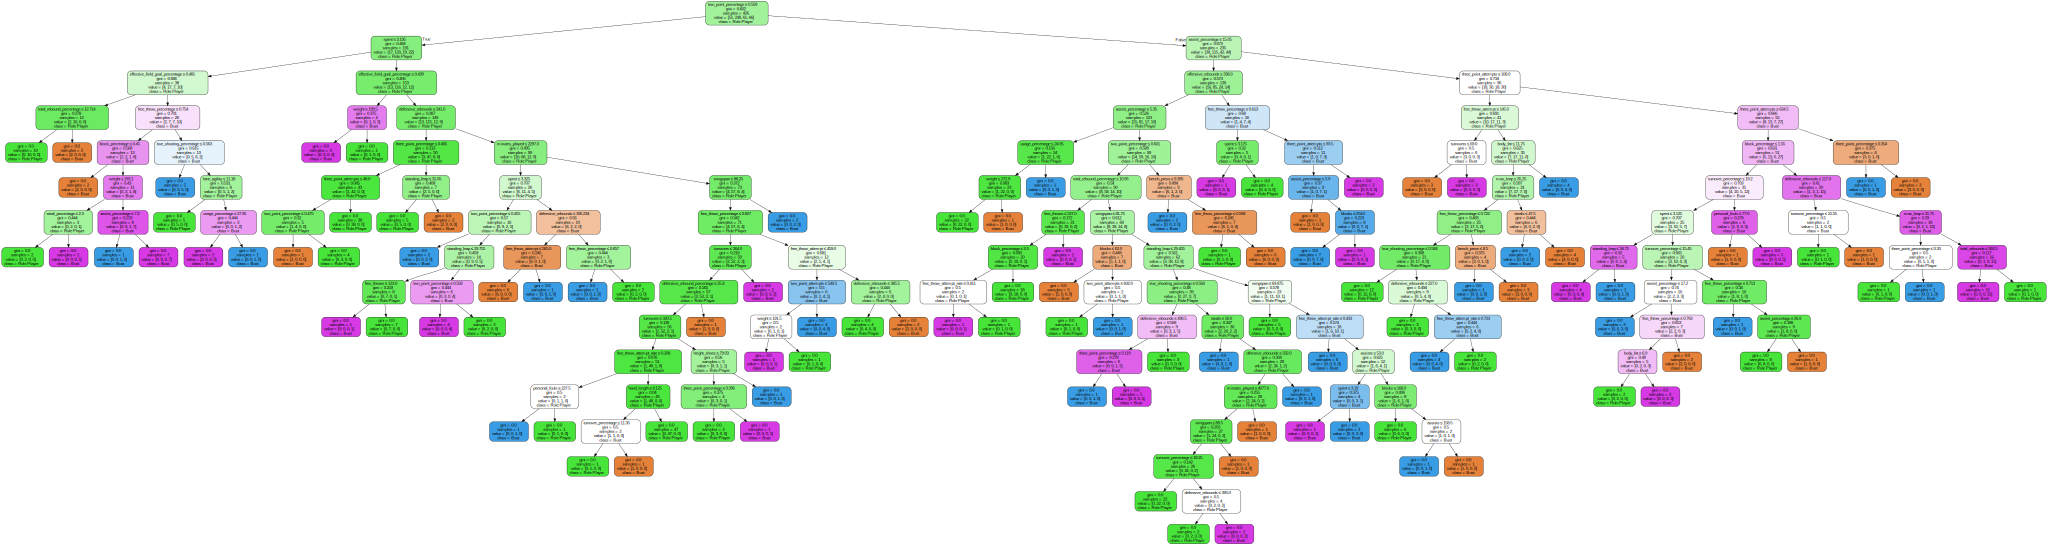

In [9]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('../assets/images/nba_clf.png')

graph = graphviz.Source(dot_data)  
graph 

In [32]:
from sklearn.tree import export_graphviz

for i in range(200):
    # Extract single tree
    estimator = rf.estimators_[i]

    # Export as dot file
    fd = "../data/nba_rf_" + str(i) + ".dot"
    fp = "../assets/images/nba_rf_" + str(i) + ".png"
    export_graphviz(estimator, out_file=(fd), 
                feature_names = feature_names,
                class_names = target,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    call(['dot', '-Tpng', fd, '-o', fp, '-Gdpi=300'])

    # Display in jupyter notebook
    from IPython.display import Image
    Image(filename = fp)
    print(str(i) + " complete")

0 complete
1 complete
2 complete
3 complete
4 complete
5 complete
6 complete
7 complete
8 complete
9 complete
10 complete
11 complete
12 complete
13 complete
14 complete
15 complete
16 complete
17 complete
18 complete
19 complete
20 complete
21 complete
22 complete
23 complete
24 complete
25 complete
26 complete
27 complete
28 complete
29 complete
30 complete
31 complete
32 complete
33 complete
34 complete
35 complete
36 complete
37 complete
38 complete
39 complete
40 complete
41 complete
42 complete
43 complete
44 complete
45 complete
46 complete
47 complete
48 complete
49 complete
50 complete
51 complete
52 complete
53 complete
54 complete
55 complete
56 complete
57 complete
58 complete
59 complete
60 complete
61 complete
62 complete
63 complete
64 complete
65 complete
66 complete
67 complete
68 complete
69 complete
70 complete
71 complete
72 complete
73 complete
74 complete
75 complete
76 complete
77 complete
78 complete
79 complete
80 complete
81 complete
82 complete
83 complete
84